In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.vision import *

In [6]:
!pwd

/home/ubuntu/expression


In [7]:
! pip install fastai

In [8]:
!ls

CASME	 CASME2      ME_multiclass.ipynb		  SAMM
casme_2  final_data  Micro-Expression-with-Deep-Learning  SMIC-E


In [9]:
path = pathlib.Path('/home/ubuntu/expression/final_data')
path

PosixPath('/home/ubuntu/expression/final_data')

In [10]:
! ls /home/ubuntu/expression/final_data/

anger_boy      disgust_boy   happiness_boy   repression_boy   surprise_boy
anger_girl     disgust_girl  happiness_girl  repression_girl  surprise_girl
contempt_boy   fear_boy      others_boy      sadness_boy      tense_boy
contempt_girl  fear_girl     others_girl     sadness_girl     tense_girl


In [11]:
tfms = get_transforms(max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [12]:
data = (ImageList.from_folder(path)
                         .split_by_rand_pct(0.2)
                         .label_from_folder(label_delim='_')
                         .transform(tfms, size=224)
                         .databunch()
                         .normalize(imagenet_stats))

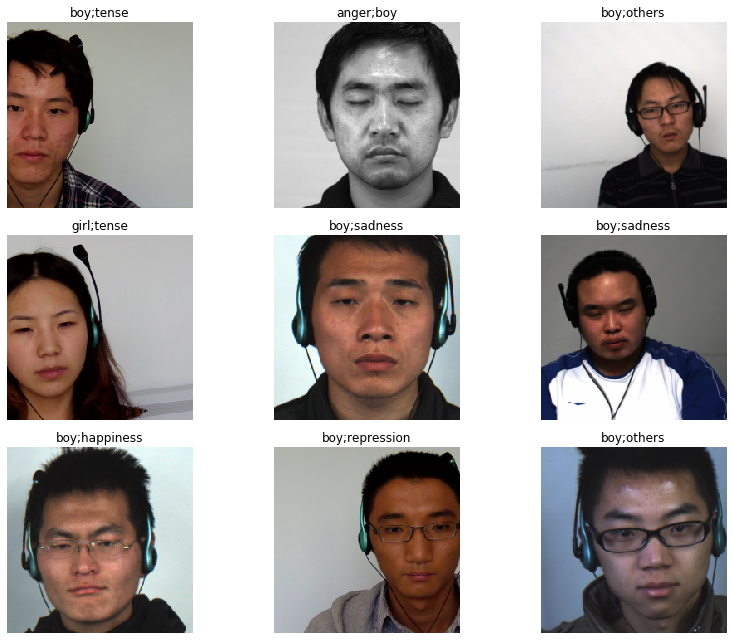

In [13]:
data.show_batch(rows=3, figsize=(12,9))

In [14]:
arch = models.resnet50

In [54]:
acc_02 = partial(accuracy_thresh, thresh=0.4)
f_score = partial(fbeta, thresh=0.4)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

In [55]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f09e89afb70>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


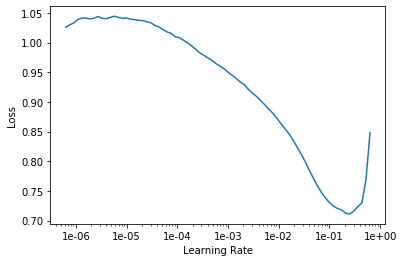

In [56]:
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(2, max_lr=slice(1e-3,5e-2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


KeyboardInterrupt: 

In [19]:
lr = 0.01

In [20]:
learn.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.076386,0.061473,0.965638,0.945279,07:14
1,0.063704,0.049792,0.972643,0.960400,07:12
2,0.052189,0.037167,0.974958,0.970016,07:12


In [21]:
learn.save('stage-1-rn50')

In [22]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.073543,0.066265,0.960715,0.943577,07:17
1,0.062053,0.069144,0.965247,0.940167,07:17
2,0.044680,0.035430,0.978727,0.974096,07:14
3,0.032547,0.025677,0.982263,0.979681,07:18
4,0.026323,0.022519,0.984180,0.982431,07:16


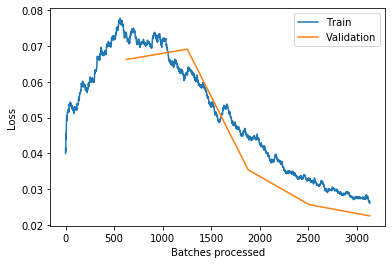

In [24]:
learn.recorder.plot_losses()

In [25]:
learn.save('stage-2-rn50')

In [26]:
learn.export()

## Test

In [30]:
!ls final_data/fear_boy/007_2069.jpg

final_data/fear_boy/007_2069.jpg


In [31]:
path

PosixPath('/home/ubuntu/expression/final_data')

In [ ]:
path_test = '/home/ubuntu/expression/test'

In [58]:
#test = ImageList.from_folder(path/'test-jpg').add(ImageList.from_folder(path/'test-jpg-additional'))
test = ImageList.from_folder(path_test)
len(test)

1

In [59]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [60]:
thresh = 0.4
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
labelled_preds

['anger girl']

In [61]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
labelled_preds

['anger girl tense']